Før du starter, installer modulen ved å kjøre følgende linje

In [ ]:
%pip install -q xdai

<img src="gpr_vis_9.png" width = 100%>

# Med kunstig intelligens som labpartner

<a href="https://hazelbright.github.io/xdai">XDAI</a> og dette dokumentet er utviklet av Audun Skau Hansen <a href="mailto:auduns@uio.no">✉</a>, Stian Kogler, Hanne Røberg-Larsen, Steven H. R. Wilson, Elias Dalan, Ayla S. Coder, Hanan Gharayba og Maren H.S. Johnsen ved Universitetet i Oslo, våren 2023.

---

**Hvordan får vi mest mulig informasjon ut av et eksperiment med færrest mulig målinger? La oss se på en mulig fremgangsmåte som vil kunne hjelpe deg å løse dette problemet.**

Moderne maskinlærings(ML)-teknikker er gjerne basert på store **datasett**, bestående av "inn-data" i form av **målinger** (innen ML typisk kalt "features") med tilhørende "ut-data" i form av **resultater** (innen ML gjerne kalt "labels" eller "targets"). En ML-teknikk som kalles "supervised learning" har som mål å trene en **modell** så den kan gjøre **prediksjoner** i samsvar med datasettet. Du har kanskje vært borti dette før gjennom lineær regresjon, hvor modellen er et polynom.

<p></p>
<div>
    <img src="regression_model_4.png" width = 60%>
    <center><b>Figur 1:</b> Maskinlæring: et datasett med målinger og resultater brukes for å lære opp en modell på datamaskinen.</center>
</div>
<p></p>
<p></p>



## Bayesiansk optimering

Eksperimenter kan imidlertid være tids- og arbeidskrevende, og vi har ikke alltid tilgang på store datasett. I tillegg kan det være en utfordring at vi ikke har forutsetning for å anta noe om den matematiske formen på resultatene. I slike tilfeller passer det å benytte noe som kalles **Gaussiske prosesser** (GP) som modell. Å benytte GP for å predikere et maksimum (topp- eller bunnpunkt) i målingene er en form for det som kalles for **Bayesiansk optimering** (BO). 

En fordel med denne metoden er at den kan ta måleusikkerhet med i betraktningen, noe som gjør den spesielt godt egnet til å analysere eksperimentelle data.

En mer detaljert introduksjon til Bayesiansk optimering finnes i følgende kilder:

<table>
    <tr>
        <th>
            En artikkel om Bayesiansk optimering for eksperimentell design
        </th>
        <th>
        <p>Greenhill, S., Rana, S., Gupta, S., Vellanki, P., & Venkatesh, S. (2020). <a href="https://ieeexplore.ieee.org/abstract/document/8957442">*Bayesian optimization for adaptive experimental design: A review.*</a> IEEE access, 8, 13937-13948.</p>
            </th>
    </tr>
    <tr>
          <th>
              En artikkel om Bayesiansk optimering generelt
        </th>
        <th>
    <p>Shahriari, B., Swersky, K., Wang, Z., Adams, R. P., & De Freitas, N. (2015). <a href="https://ieeexplore.ieee.org/abstract/document/7352306">*Taking the human out of the loop: A review of Bayesian optimization.*</a> Proceedings of the IEEE, 104(1), 148-175.</p></tr>
    </th>
    <th>
              Mer detaljert om hvordan man utvikler en Gaussian process regressor
        </th>
        <th>
    <p>Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2021). <a href="https://d2l.ai/chapter_gaussian-processes/index.html">*Dive into deep learning*</a>. arXiv preprint arXiv:2106.11342.</p></tr>
    </th>
</table>






## Mål for denne notebooken

Denne notebooken gir en innføring i den studentutviklede Python-modulen <a href="">XDAI</a> til støtte for eksperimentelt arbeid. Notebooken er delt inn i fire deler:
1. **Eksperimentell design:**  planlegge målingene dine.
2. **Regresjon:** Tilpasse en Gaussisk prosess regressor (GPR) til datasettet ditt.
3. **Prediksjon:** Predikere en måling for optimalt resultat. (Bayesiansk optimering)
4. **Fortolkning** Visualisering av resultater.

Målet er å gjøre deg i stand til å finne optimale målepunkter for et bredt utvalg problemstillinger. Husk imidlertid at maskinlæringsmetoder ikke kan bli bedre enn de datasettene vi trener algoritmen på, så presise målinger og kritisk refleksjon rundt resultatene er avgjørende for å oppnå gode resultater.

<div class="alert alert-block alert-info">
    <h2> Diskusjonsoppgaver</h2>
<ul>    
 <li>Gi 3 eksempler på "inn-data" og "ut-data" (fra eksperiment, statistikk eller hverdagen) </li>
<li>Hvordan tolker du det å "predikere et maksimum i målingene"? </li>
<li>Hva innebærer det å optimere noe? Kan du gi noen eksempler på optimering? (hverdagslig eller vitenskapelig)</li>
<li>Kan du tenke deg tilfeller hvor du kan anta noe om formen på den matematiske formen på resultatene?</li>
<li>Kan du tenke deg tilfeller hvor du ikke kan anta noe om denne formen?</li>
<li>Hva legger du i det å "lære opp en modell på datamaskinen"? Hvordan tror du dette gjøres i praksis?</li>
    </ul>
</div>


---

## 1. **Eksperimentell design:** å planlegge målinger

Forestill deg at vi vil finne en optimal sammensetning av målevariablene $\mathbf{x}_*$ som inngår i et eksperiment (for eksempel temperatur, trykk, konsentrasjoner, varighet og lignende). Hver måling er tidkrevende, så vi ønsker å gjøre så få målinger som mulig. 

Vi planlegger derfor et begrenset antall målinger i et område hvor vi tror at den optimale sammensetningen befinner seg. Fra disse målingene vil du estimere en mer eksakt plassering av optimum. 

Det å planlegge disse målingene kalles **eksperimentell design**. Vi kommer i det følgende til å avgrense måleområdet med nedre og øvre terskelverdier i målevariablene. 

I en dimensjon er dette enkelt. Forestill deg for eksempel at vi skal finne en optimal temperatur for veksten av en bakteriekultur. Vi antar at bakteriene trives best ved romtemperatur, så vi velger et måleintervall mellom 10 og 30 grader Celsius. Deretter gjør vi målinger av vekstraten for 10 grader, 30 grader og kanskje for 20 grader (i midten av intervallet vårt). 

I det følgende bruker vi <a href="">XDAI</a> til å sette opp 1 og 2 dimensjoner. Du skal selv sette opp 3 dimensjoner.

In [1]:
import xdai
import numpy as np
import matplotlib.pyplot as plt

limits = [[10,30]]

grid_1d = xdai.designer.doe_grid( limits )

xdai.designer.html_table( grid_1d ) # display 1d table nicely formatted in noteobok

,20.0
,20.0
,20.0
,10.0
,30.0


In [ ]:
limits = [[10,30], [0,1]]

grid_1d = xdai.designer.doe_grid( limits )

xdai.designer.html_table( grid_1d ) # display 2d table nicely formatted in noteobok

In [ ]:
limits = [ ... ]

grid_1d = xdai.designer.doe_grid( limits )

xdai.designer.html_table( grid_1d ) # display 1d table nicely formatted in noteobok

### Box-Behnken design

Det finnes flere ulike teknikker for å designe et eksperiment (se for eksempel <a href="https://www.itl.nist.gov/div898/handbook/pri/section5/pri5.htm">her</a>). I tilfellene over brukte vi et  komplett faktorielt design, hvor samtlige målinger innenfor de øvre og nedre terskelverdiene inngår. For tre målevariabler (med 3 målepunkter per variabel) utgjør dette $3^3 = 27$ antall eksperimenter. 

I mange tilfeller holder det å kun benytte et utvalg av disse eksperimentene, og vi skal benytte det som kalles et Box-Behnken design []. Vi setter det opp i 2 dimensioner med XDAI på følgende måte:

In [2]:
import xdai 
import numpy as np
from scipy.interpolate import interp1d

In [3]:
import numpy as np

limits = [ [... ],[ ... ], [... ]] #sett inn dine grenser her

bb_grid = xdai.designer.doe_grid(limits, design = 2) # design=2 gir et Box-Behnken design
bb_grid

ValueError: x and y arrays must be equal in length along interpolation axis.

<p></p>
<div>
    <img src="cube_bbdesign.png" width = 60%>
    <center><b>Figur 2:</b> Box-Behnken design i tre dimensjoner gir 13 unike målepunkter, og det er vanlig med tre repetisjoner i senter av måleintervallet.</center>
</div>
<p></p>
<p></p>


Vi kan nå gjøre målingene som er illustrert i tabellen. Dette gjøres manuelt, ved å følge instruksjoner labheftet. Når målingene er utført legges de inn i en numpy-array som dette:

In [ ]:
resultater = np.array([ ... ])

---

## 2. Regresjon

Vi er nå klare til å bruke resultatene til å lage en modell. Vi skal benytte en Gaussisk Prosess Regerssor (GPR) fra XDAI modulen. Les gjerne mer om hvordan denne regressoren fungerer <a href="https://openworldlearning.github.io/docs/software/gpr/AI_in_the_lab.html">her</a> ved behov - til vårt formål er det for øvrig nok å merke seg at regressoren
- kan gi deg prediksjoner med tilhørende standardavvik.
- baserer sine prediksjoner på <a href="https://en.wikipedia.org/wiki/Bayes%27_theorem">Bayes teorem</a>.
- ikke egner seg så godt for store datasett.
- gir deg en skalar prediksjon (det er i prinsippet mulig å utvide til vektorielle prediksjoner, men XDAI-modulen har ikke støtte for dette enda). 

For å komme i gang må vi først ha noen målinger og resultater tilgjengelig som variabler. I cellen under lager vi et "lekedatasett", hvor maksimumsverdien er plassert i $\mathbf{x} = (0.25, 0.15, 0.07)$. I laboratoriet benyttes imidlertid resultatene får fra måleinstrumentene.

In [4]:
# vi genererer et eksempeldatasett under. Erstatt dette med det du planlegger i labølvelsen.

limits = np.array([ [-.4,.4], [-.2,.2], [-.3,.3]])

målinger = xdai.designer.doe_grid(limits, design = 2)

# et "lekedatasett" med optimum plassert i (.25, .15, .07)
resultater = 4*np.exp( - 1*((målinger[:,0]-.25)**2 +(målinger[:,1]-.15)**2 + (målinger[:,2]-.07)**2) )

# litt støy for å simulere virkelige data
resultater += np.random.normal(0,1,resultater.shape)*.05

Deretter kan du benytte xdai.gpr-modulen for å tilpasse datasettet. Box-Behnken-designet har tre repetisjoner i senter av måleområdet, noe som kan benyttes til å fininstille modellens parametere så for å etablere tillit til prediksjonene den gjør. I første omgang gir du derfor ikke modellen tilgang til disse tre målepunktene:

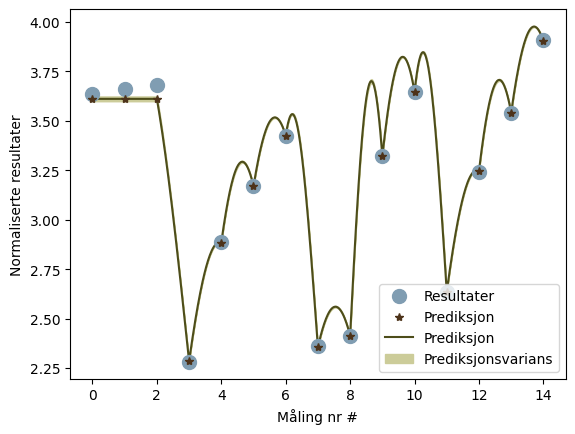

In [5]:

parametre = np.ones(målinger.shape[1])
måling_standardavvik = .001

x = målinger[3:] # målinger / input
y = -1*resultater[3:] # resultater / utput

# her initialiserer vi modellen
gpr = xdai.gpr.Regressor(x, y,measurement_standard_deviation=måling_standardavvik, params = parametre) 

# vi plotter til slutt resultatene

plt.figure()

# resultatene
plt.plot(resultater, "o", label = "Resultater", zorder = 4, markersize = 10, color = np.array([.1,.2,.3])**.3)

# prediksjonene
plt.plot(-1*gpr.predict(målinger), "*", label = "Prediksjon", zorder = 5, color = np.array([.3,.2,.1]))

# en sti mellom alle målepunktene (se figuren under):
X3p = interp1d(np.linspace(0,1,målinger.shape[0]), målinger.T)(np.linspace(0,1,målinger.shape[0]*50))

# prediker punkter langs stien (med varians)
fx, fv = gpr.predict(X3p.T, return_variance = True) #predict results and variance

# prediksjoner langs stien
plt.plot(np.linspace(0,målinger.shape[0]-1,målinger.shape[0]*50),-1*fx,"-",  label = "Prediksjon", color = (.3,.3,.1))

# varians langs stien
plt.fill_between(np.linspace(0,målinger.shape[0]-1,målinger.shape[0]*50),-fx-fv,-fx+fv,  label = "Prediksjonsvarians", color = (.8,.8,.6))

plt.ylabel("Normaliserte resultater")
plt.xlabel("Måling nr #")
plt.legend()
plt.show()

<p></p>
<div>
    <img src="cube_bbdesign_path_enumerated.png" width = 60%>
    <center><b>Figur 3:</b> Når modellen/regressoren er tilpasset datasettet kan vi bruke den til å reprodusere resultatene både i og utenfor målepunktene.  I figuren over vises veien mellom målepunktene hvor vi har gjort prediksjoner, hvor rekkefølgen er indikert med tallindekser. </center>
</div>
<p></p>
<p></p>


<div class="alert alert-block alert-info">
    <h2> Diskusjonsoppgaver</h2>
<ul>    
 <li>Hva representerer de blå punktene og sorte stjernene i figuren vi laget over? Er de identiske? Hvordan forklarer du dette?</li>
<li>Den kontinuerlige linjen mellom resultatene er prediksjoner langs en linje trukket mellom målepunktene. Det er litt vanskelig å forstår fra koden hvordan dette fungerer i tre dimensjoner. Kan dere forklare det for hverandre i en dimensjon ved hjelp av en tavle? </li>
<li>Hvor er variansen i prediksjonene størst? Hvordan forklarer du dette?</li>
<li>Hvordan skiller resultat og prediksjon i de tre første målepunktene seg fra resten av datasettet? Kan du forklare hvordan denne forskjellen oppstår?</li>
<li>Kopier cellene over og tilpass skriptet så det kjører for 4 dimensjoner.</li>
    </ul>
</div>


### Trening

Vi vil nå finne de parametrene som gir best prediksjoner sammenliknet med det vi vet om de tre målingene i senter av boksen. Dette kan automatiseres (men krever en våken bruker dersom optimeringsalgoritmen foreslår urimelige verdier), noe vi gjør på følgende måte:

In [6]:
optimale_parametre = xdai.gpr.parameter_optimization(målinger,-resultater, params = parametre*.1, training_subset = np.arange(3,resultater.shape[0]),measurement_standard_deviation=måling_standardavvik) #, normalize_y = True)
print("Optimerte parametere:", optimale_parametre)

gpr = xdai.gpr.Regressor(x, y,measurement_standard_deviation=måling_standardavvik, params = optimale_parametre) 



Optimerte parametere: [1.48311103 1.06701453 1.4725185 ]


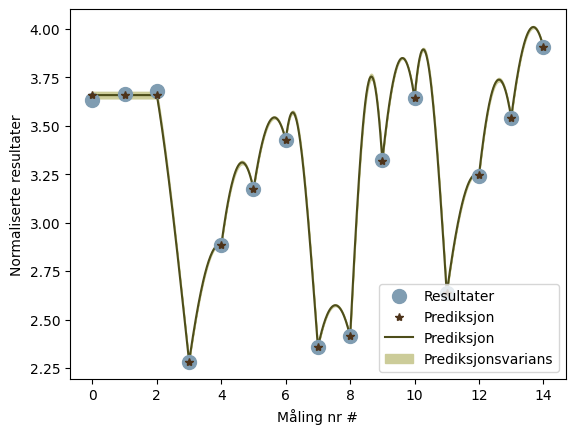

In [7]:
# vi plotter resultatene

plt.figure()
# resultatene
plt.plot(resultater, "o", label = "Resultater", zorder = 4, markersize = 10, color = np.array([.1,.2,.3])**.3)

# prediksjonene
plt.plot(-1*gpr.predict(målinger), "*", label = "Prediksjon", zorder = 5, color = np.array([.3,.2,.1]))

X3p = interp1d(np.linspace(0,1,målinger.shape[0]), målinger.T)(np.linspace(0,1,målinger.shape[0]*50))

fx, fv = gpr.predict(X3p.T, return_variance = True) #predict results and variance


plt.plot(np.linspace(0,målinger.shape[0]-1,målinger.shape[0]*50),-1*fx,"-",  label = "Prediksjon", color = (.3,.3,.1))
plt.fill_between(np.linspace(0,målinger.shape[0]-1,målinger.shape[0]*50),-fx-fv,-fx+fv,  label = "Prediksjonsvarians", color = (.8,.8,.6))
plt.ylabel("Normaliserte resultater")
plt.xlabel("Måling nr #")
plt.legend()
plt.show()
#params = 0.001

<div class="alert alert-block alert-info">
<h2> Diskusjonsoppgave</h2>
<p>Hvordan endret modellen seg som følge av treningen? Ble prediksjonen i de tre første treningspunktene bedre eller dårligere? Hva med variansen?</p>
</div>

---

## 3. Prediksjon

Å gjøre en prediksjon betyr å forutsi noe ukjent basert på det vi allerede vet. Når modellen er trent er den i prinsippet i stand til å forutsi utfallet av målinger utenfor de målepunktene vi har lagt inn i datasettet med en viss grad av sikkerhet. 

Ettersom prediksjoner fra modellen produseres langt mer effektivt enn ekte eksperimenter i laboratoriet, kan vi be modellen om å forutsi hvilke målevariabler som gir forventet laveste måleresultater. (Merk at vi kan også finne maksimum, men slik koden er skrevet må vi i så fall sende inn resultatene multiplisert med en faktor på $-1$.)

For å gjøre dette må vi først velge et område hvor vi vil søke etter et minimum. Velg først noen øvre og nedre terskelverdier, gjerne over og under de grensene vi valgte for å avgrense målingene våre (det kan tenkes at optimeringen foreslår en måling utenfor området vårt):

In [8]:
# øvre og nedre terskelverdier for målevariablene (optimeringen vil ikke søke utenfor dette området)
bounds = np.array([[-2,-2,-2],[2,2,2]])

Deretter velger vi et startgjett for optimeringen og søker oss frem til (formodentlig nærmeste) minimum fra dette:

In [9]:

# velg et sted å starte søket fra
guess = målinger[np.argmax(resultater)]

# prediker et minimum
opt, optfun, suc = gpr.predict_sample_optimum( guess,  xi = .03, bounds = bounds )

# xi = "utforskningsparameter" - hvor mye algoritmen søker seg ut fra kjente områder
# opt = målepunktet for det predikerte minimumet
# optfun = funksjonsverdien i dette punktet
# suc = 0 hvis optimeringen ikke konvergerte, 1 ellers

# vis prediksjonen (og variansen) i punktet
gpr.predict(opt.reshape(-1,3), return_variance = True)

(array([-4.02861416]), array([0.0077417]))

Det kan være flere minimum i modellen. Derfor lønner det seg å søke litt rundt, for eksempel ved å endre "utforskningsparameteren" `xi`, eller startgjettet `guess`. XDAI har en funksjon som automatiserer slike søk:

In [10]:
e = xdai.process.acquire_model_optimas(gpr)

for i in e:
    print("%.2f. %.2f %.2f %.2e %.2e" % (i[0], i[1], i[2], i[3], i[4]))

0.26. 0.14 0.08 -4.03e+00 7.69e-03


---

## 4. Fortolkning

Vi har nå planglagt og gjennomført et sett målinger, tilpasset en modell til disse målingene, og benyttet modellen til å predikere en optimal måling. Har vi funnet et minimum? Den eneste måten å virkelig teste dette på er å gjennomføre den faktiske målingen i dette punktet. Samtidig er det viktig å dokumentere resultater og fremgangsmåte, slik at andre kan reprodusere arbeidet vårt.

Vi kan benytte `xdai.process.data_projection` for å gi en visuell fremstilling av minimumet vi har funnet:

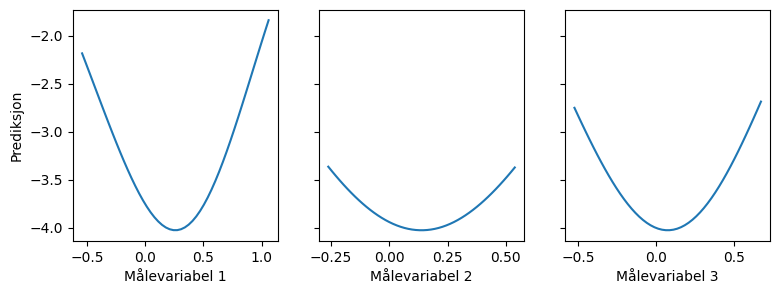

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

x,y = xdai.process.data_projection(gpr, axes = [0], resolution = 50, center = e[0][:3])


axs[0].plot(x[0],y)
axs[0].set_xlabel("Målevariabel 1")
x,y = xdai.process.data_projection(gpr, axes = [1], resolution = 50, center = e[0][:3])


axs[1].plot(x[0], y)
axs[1].set_xlabel("Målevariabel 2")


x,y = xdai.process.data_projection(gpr, axes = [2], resolution = 50, center = e[0][:3])

axs[2].plot(x[0], y)
axs[2].set_xlabel("Målevariabel 3")
axs[0].set_ylabel("Prediksjon")

plt.show()

Figurene over viser hvordan modellen endrer seg når vi holde to målevariabler fast i minimumet, og lar en målevariabel endre seg som angitt på x-aksen. 

Vi bør også notere oss ned alle måledata og resultater:

In [49]:
print(" Optimized minimum:", e)

xdai.designer.html_table( np.append(målinger.T, resultater).reshape(-1,15).T, 
                         rows = np.arange(1,len(målinger)+1), 
                         columns = ["Måling nummer", 
                                    "Målevariabel 1", 
                                    "Målevariabel 2",
                                    "Målevariabel 3", 
                                    "Resultater"])

 Optimized minimum: [[ 0.2586568   0.13835917  0.07573589 -4.02861876  0.00768773]]


Måling nummer,Målevariabel 1,Målevariabel 2,Målevariabel 3,Resultater
1,0.0,0.0,0.0,3.632965307602163
2,0.0,0.0,0.0,3.6625738023623797
3,0.0,0.0,0.0,3.678440158232084
4,-0.4,-0.2,0.0,2.281209545711218
5,0.0,-0.2,-0.3,2.8855044336915543
6,0.0,-0.2,0.3,3.1727434553219624
7,0.4,-0.2,0.0,3.424469970032216
8,-0.4,0.0,-0.3,2.359910153601789
9,-0.4,0.0,0.3,2.4144946575328565
10,0.4,0.0,-0.3,3.322125120556541


I tillegg bør vi lagre parametrene vi har benyttet i modellen:

In [47]:
print("Bounds for optimization:")
print(bounds)
print(" ")
print("Model length parameters:")
print(optimale_parametre)
print(" ")
print("Model length parameters:")
print(optimale_parametre)


Bounds for optimization:
[[-2 -2 -2]
 [ 2  2  2]]
 
Model length parameters:
[1.48311103 1.06701453 1.4725185 ]


Alle disse opplysningene skal være med i rapporten din.